Лабораторна робота №1 "Linear Regression"

Виконав: студент групи ДА-12 Рябін Нікіта

Мета: Навчитись реалізовувати лінійну регресію та градієнтний спуск.

Завдання

Викачати необхідні дані.
Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
Візуалізувати дані з lab_1_train.csv.
Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab_1_test.csv.
Візуалізувати на одному графіку дані з lab_1_train.csv, lab_1_test.csv та лінію, до якої зійшовся розв’язок.

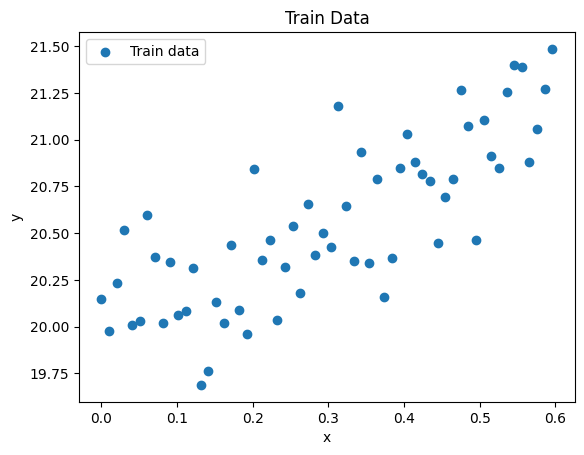

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    X = data[:, 1]
    Y = data[:, 2]
    return X, Y

# Розділяємо дані на колонки 'x' і 'y'
x_train, y_train = read_csv('lab_1_train.csv')  # Колонка 'y'
x_test, y_test = read_csv('lab_1_test.csv')

plt.scatter(x_train, y_train, label='Train data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train Data')
plt.legend()
plt.show()

In [45]:
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

def linear_regression(X, Y, iterations=10000, learning_rate=0.02, stopping_threshold=1e-6):
    w = np.zeros(1)
    b = 0
    losses = []
    n = float(len(X))
    
    for i in range(iterations):
        Y_pred = w * X + b
        loss = mean_squared_error(Y, Y_pred)
        losses.append(loss)

        if len(losses) > 1 and abs(losses[-1] - losses[-2]) < stopping_threshold:
            break
            
        # Оновлення ваг та зміщення
        weight_derivative = -(2/n) * np.dot(X.T, (Y - Y_pred))
        bias_derivative = -(2/n) * np.sum(Y - Y_pred)

        # Updating weights and bias
        w = w - (learning_rate * weight_derivative)
        b = b - (learning_rate * bias_derivative)

        print(f'iter {i}: w = {w[0]}, b = {b}, loss = {loss}')

        # Перевірка на збіжність

    return w, b

estimated_weight, estimated_bias = linear_regression(x_train, y_train, iterations=5000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")


iter 0: w = 0.24735626930729745, b = 0.8219825276415381, loss = 422.47740188480714
iter 1: w = 0.48373387099654963, b = 1.6081374673311257, loss = 386.43951423832743
iter 2: w = 0.7096122718221887, b = 2.360028779433197, loss = 353.4792736493775
iter 3: w = 0.9254500076040149, b = 3.0791521510413444, loss = 323.3338412690759
iter 4: w = 1.1316855969493456, b = 3.766937976388979, loss = 295.7628253668082
iter 5: w = 1.3287384150874115, b = 4.424754207152733, loss = 270.54636428817014
iter 6: w = 1.5170095295572665, b = 5.053909078328332, loss = 247.48337313326883
iter 7: w = 1.696882499414461, b = 5.6556537151107005, loss = 226.38994017324026
iter 8: w = 1.8687241395490388, b = 6.231184625972971, loss = 207.09786021695098
iter 9: w = 2.0328852516378904, b = 6.7816460869122785, loss = 189.45329323198257
iter 10: w = 2.189701323188011, b = 7.308132421613358, loss = 173.31553752286018
iter 11: w = 2.3394931960636285, b = 7.811690182073575, loss = 158.55590768303858
iter 12: w = 2.482567705

In [46]:
test_Y_pred = estimated_weight * x_test + estimated_bias
test_loss = np.mean((test_Y_pred - y_test) ** 2)
print(f'Test Loss: {test_loss}')

Test Loss: 0.07387827405700162


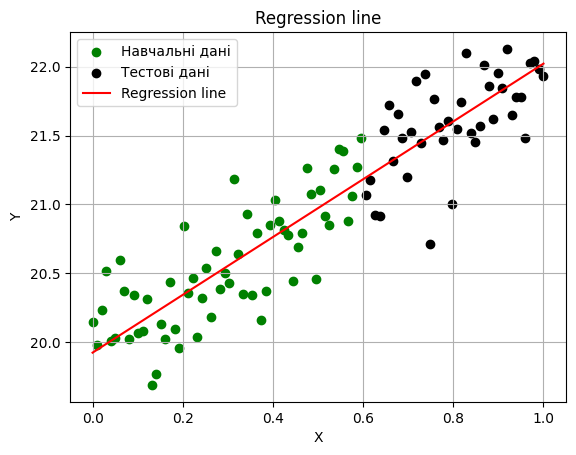

In [47]:
plt.scatter(x_train, y_train, color='green', label='Навчальні дані')
plt.scatter(x_test, y_test, color='black', label='Тестові дані')

combined_X = np.concatenate((x_train, x_test))
x_values = np.linspace(combined_X.min(), combined_X.max(), 100)
y_values = estimated_weight * x_values + estimated_bias

plt.plot(x_values, y_values, color='red', label='Regression line')
plt.title('Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()